<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 5.1 이항 분류

In [61]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [62]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())
print(red.shape)
print(white.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [63]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

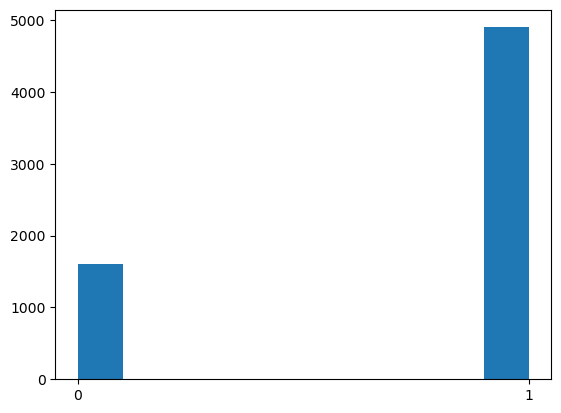

1    4898
0    1599
Name: type, dtype: int64


In [64]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [65]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [66]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [67]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy() # numpy 배열 객체로 전환
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1005       0.247934          0.186667     0.192771        0.018405   0.096346   
388        0.330579          0.253333     0.156627        0.019939   0.131229   
1439       0.190083          0.113333     0.295181        0.107362   0.071429   
2284       0.297521          0.166667     0.156627        0.230061   0.066445   
1992       0.264463          0.026667     0.168675        0.087423   0.079734   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1005             0.010417              0.004608  0.109697  0.496124   
388              0.076389              0.108295  0.211876  0.550388   
1439             0.229167              0.506912  0.163678  0.341085   
2284             0.229167              0.470046  0.230576  0.263566   
1992             0.055556              0.223502  0.165606  0.604651   

      sulphates   alcohol   quality  type  
1005   0.185393  0.695652  0.666667   0.0 

In [68]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1] # type 제외 : y값으로 사용하려고
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0]) # 0.0
print(test_X[0])
print(test_Y[0]) # 1.0
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
# 원-핫 인코딩 : 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
 # to_categorical : 정수 형식의 클래스 레이블을 범주형(one-hot) 형식으로 변환하는 데 사용 -> 
print(train_Y[0]) # [1. 0.]
print(test_Y[0]) # [0. 1.]

[0.24793388 0.18666667 0.19277108 0.01840491 0.09634551 0.01041667
 0.00460829 0.10969732 0.49612403 0.18539326 0.69565217 0.66666667]
0.0
[0.30578512 0.08       0.29518072 0.0107362  0.03654485 0.02430556
 0.20967742 0.09041835 0.26356589 0.2247191  0.44927536 0.33333333]
1.0
[1. 0.]
[0. 1.]


In [69]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : 훈련 데이터의 label(y/target) 값이 원핫 벡터일 때 사용

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 48)                624       
                                                                 
 dense_21 (Dense)            (None, 24)                1176      
                                                                 
 dense_22 (Dense)            (None, 12)                300       
                                                                 
 dense_23 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


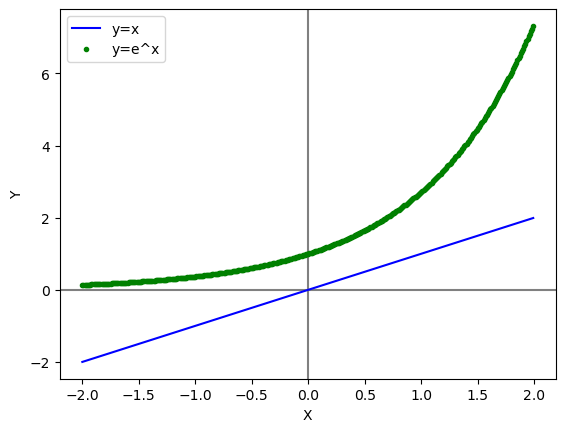

In [70]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [71]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 2ms/step - loss: 0.1261 - accuracy: 0.9577 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9849 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9849 - val_loss: 0.0293 - val_accuracy: 0.9892
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.0370 - val_accuracy: 0.9908
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0394 - val_accuracy: 0.9885
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9815 - val_loss: 0.0770 - val_accuracy: 0.9900
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9885 - val_loss: 0.0288 - val_accuracy: 0.9931
Epoch 

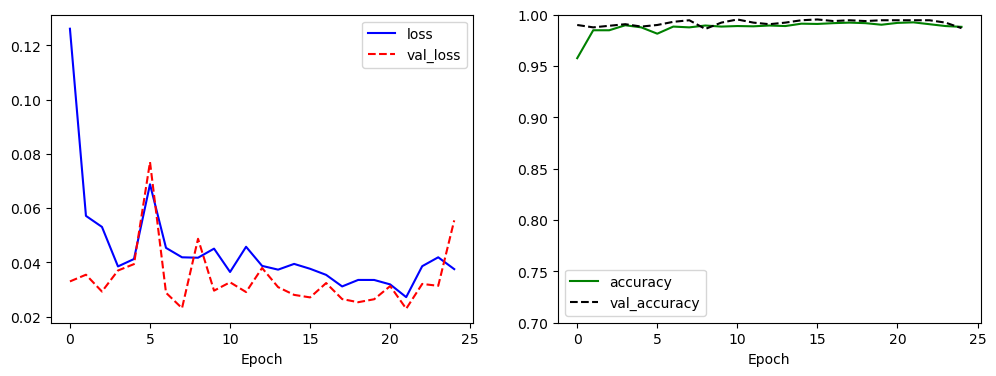

In [72]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [73]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 812us/step - loss: 0.0500 - accuracy: 0.9900


[0.049978531897068024, 0.9900000095367432]

#5.2 다항 분류

In [74]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


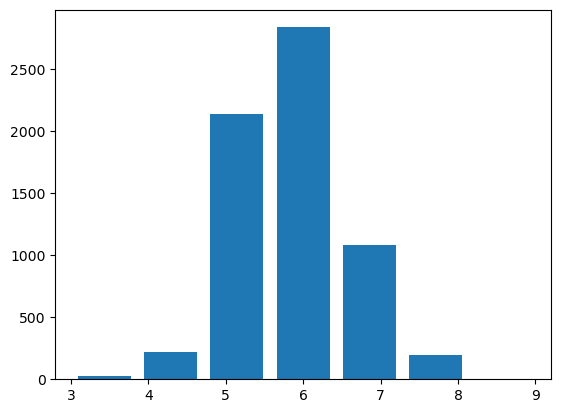

In [75]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [76]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [77]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [78]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 2ms/step - loss: 0.9925 - accuracy: 0.4973 - val_loss: 0.9005 - val_accuracy: 0.5615
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8999 - accuracy: 0.5538 - val_loss: 0.8628 - val_accuracy: 0.5762
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8718 - accuracy: 0.5697 - val_loss: 0.8559 - val_accuracy: 0.5762
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8683 - accuracy: 0.5676 - val_loss: 0.8588 - val_accuracy: 0.5700
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.5804 - val_loss: 0.8523 - val_accuracy: 0.5892
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8532 - accuracy: 0.5815 - val_loss: 0.8516 - val_accuracy: 0.5769
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8518 - accuracy: 0.5781 - val_loss: 0.8572 - val_accuracy: 0.5662
Epoch 

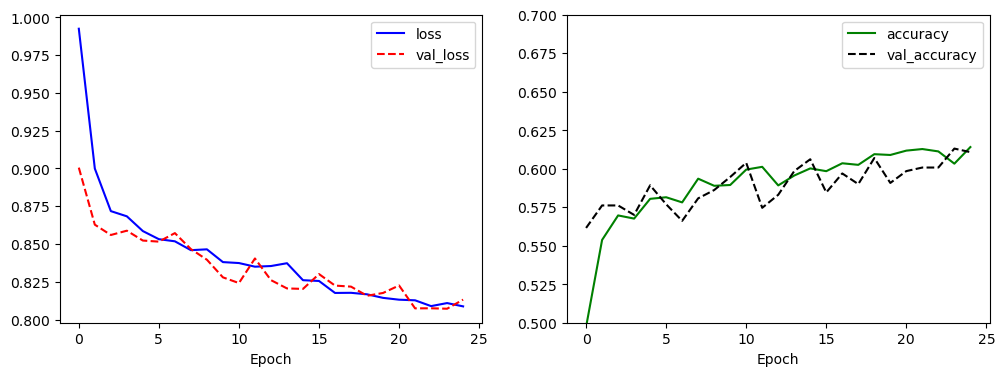

In [79]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

In [80]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 819us/step - loss: 0.8285 - accuracy: 0.5923


[0.8285219073295593, 0.5923076868057251]

#5.3 Fashion MNIST

In [81]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


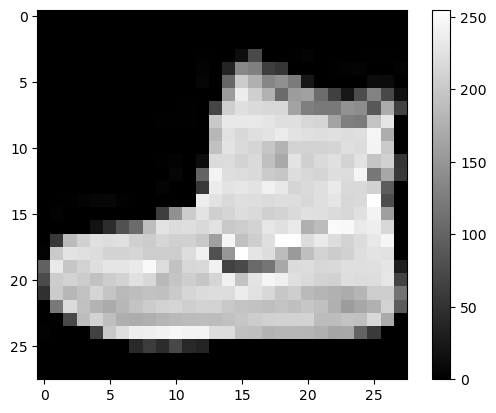

9


In [82]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [83]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [84]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [85]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5246 - accuracy: 0.8174 - val_loss: 0.4174 - val_accuracy: 0.8502
Epoch 2/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8593 - val_loss: 0.3700 - val_accuracy: 0.8680
Epoch 3/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3481 - accuracy: 0.8742 - val_loss: 0.3666 - val_accuracy: 0.8685
Epoch 4/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3230 - accuracy: 0.8819 - val_loss: 0.3861 - val_accuracy: 0.8587
Epoch 5/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.8884 - val_loss: 0.3250 - val_accuracy: 0.8829
Epoch 6/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2882 - accuracy: 0.8926 - val_loss: 0.3287 - val_accuracy: 0.8815
Epoch 7/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2725 - accuracy: 0.8999 - val_loss: 0.3292 - val_accuracy:

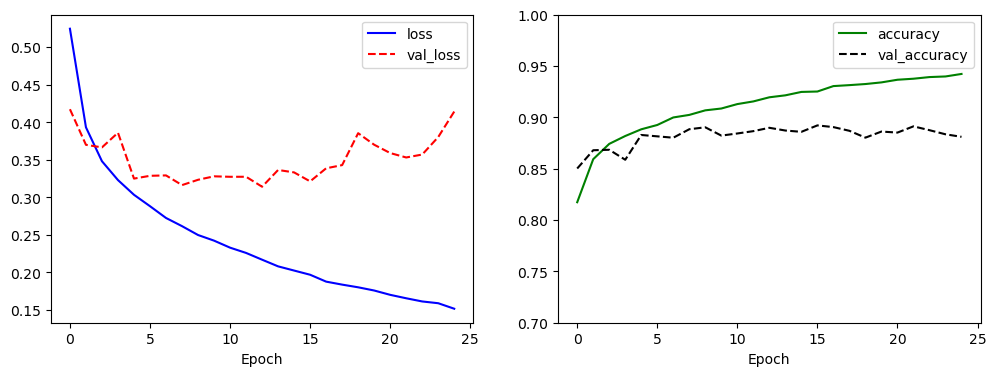

In [86]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [87]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 829us/step - loss: 0.4297 - accuracy: 0.8745


[0.4297409653663635, 0.8744999766349792]